In [10]:
#imports
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load data
stock_tickers = ["KO","PEP"]
data = yf.download(stock_tickers, start = "2012-01-01",end ="2022-12-31", interval = '1mo', progress = False)
data

YF.download() has changed argument auto_adjust default to True


Price           Close                   High                    Low  \
Ticker             KO         PEP         KO         PEP         KO   
Date                                                                  
2012-01-01  22.388090   44.592674  23.442349   45.624821  22.069823   
2012-02-01  23.160545   42.738892  23.200330   45.482224  22.351616   
2012-03-01  24.536386   45.423870  24.662366   45.526563  22.709667   
2012-04-01  25.487514   45.184242  25.988448   45.773007  23.984713   
2012-05-01  24.956530   46.450787  25.961735   47.470854  24.535744   
...               ...         ...        ...         ...        ...   
2022-08-01  56.804508  158.780090  60.265618  166.890993  56.795305   
2022-09-01  51.566833  150.475632  57.881516  161.268666  51.465577   
2022-10-01  55.494034  168.485794  56.476887  169.784831  50.088351   
2022-11-01  58.980381  172.132385  59.045286  173.162341  53.871404   
2022-12-01  59.398674  167.632141  60.416507  173.366478  58.203418   

Price                        Open                 Volume             
Ticker             PEP         KO         PEP         KO        PEP  
Date                                                                 
2012-01-01   43.546949  23.256695   45.400736  300231600  120704200  
2012-02-01   42.324678  22.504119   44.809969  287665000  213830000  
2012-03-01   42.548510  23.163861   43.164658  410250600  138520100  
2012-04-01   44.253173  24.655965   45.362242  292370000  120469200  
2012-05-01   44.965184  25.560989   45.129489  335390800  186868900  
...                ...        ...         ...        ...        ...  
2022-08-01  158.715565  58.995313  160.881550  223178000   83528400  
2022-09-01  150.245208  56.684857  157.535805  317560600  113613100  
2022-10-01  149.371308  52.258043  151.728150  325950900  115063100  
2022-11-01  162.770005  55.660936  167.891947  269982400   97984000  
2022-12-01  165.525833  59.398674  172.104551  245985300   96723500  

[132 rows x 10 columns]

In [9]:
#compute log returns
data['ret_log_KO'] = np.log(data['Close']['KO'] / data['Close']['KO'].shift(1))
data['ret_log_PEP'] = np.log(data['Close']['PEP'] / data['Close']['PEP'].shift(1))
data

Price           Close                   High                    Low  \
Ticker             KO         PEP         KO         PEP         KO   
Date                                                                  
2012-01-01  22.388090   44.592674  23.442349   45.624821  22.069823   
2012-02-01  23.160545   42.738892  23.200330   45.482224  22.351616   
2012-03-01  24.536386   45.423870  24.662366   45.526563  22.709667   
2012-04-01  25.487514   45.184242  25.988448   45.773007  23.984713   
2012-05-01  24.956530   46.450787  25.961735   47.470854  24.535744   
...               ...         ...        ...         ...        ...   
2022-08-01  56.804508  158.780090  60.265618  166.890993  56.795305   
2022-09-01  51.566833  150.475632  57.881516  161.268666  51.465577   
2022-10-01  55.494034  168.485794  56.476887  169.784831  50.088351   
2022-11-01  58.980381  172.132385  59.045286  173.162341  53.871404   
2022-12-01  59.398674  167.632141  60.416507  173.366478  58.203418   

Price                        Open                 Volume             \
Ticker             PEP         KO         PEP         KO        PEP   
Date                                                                  
2012-01-01   43.546949  23.256695   45.400736  300231600  120704200   
2012-02-01   42.324678  22.504119   44.809969  287665000  213830000   
2012-03-01   42.548510  23.163861   43.164658  410250600  138520100   
2012-04-01   44.253173  24.655965   45.362242  292370000  120469200   
2012-05-01   44.965184  25.560989   45.129489  335390800  186868900   
...                ...        ...         ...        ...        ...   
2022-08-01  158.715565  58.995313  160.881550  223178000   83528400   
2022-09-01  150.245208  56.684857  157.535805  317560600  113613100   
2022-10-01  149.371308  52.258043  151.728150  325950900  115063100   
2022-11-01  162.770005  55.660936  167.891947  269982400   97984000   
2022-12-01  165.525833  59.398674  172.104551  245985300   96723500   

Price      ret_log_KO ret_log_PEP  
Ticker                             
Date                               
2012-01-01        NaN         NaN  
2012-02-01   0.033921   -0.042460  
2012-03-01   0.057707    0.060928  
2012-04-01   0.038032   -0.005289  
2012-05-01  -0.021053    0.027645  
...               ...         ...  
2022-08-01  -0.039090   -0.015494  
2022-09-01  -0.096737   -0.053719  
2022-10-01   0.073397    0.113050  
2022-11-01   0.060929    0.021412  
2022-12-01   0.007067   -0.026492  

[132 rows x 12 columns]

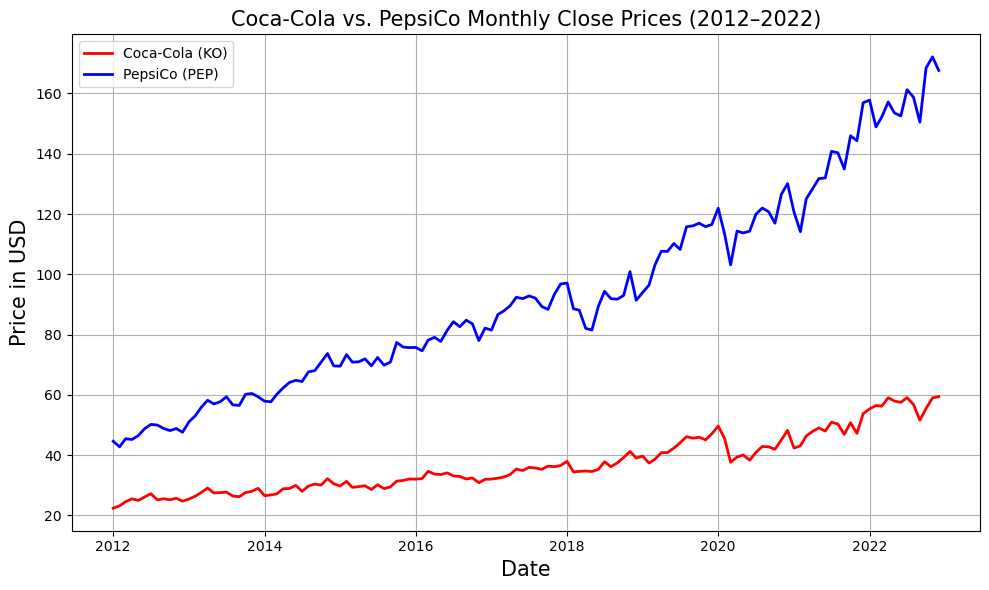

In [19]:
#graph closing values
close_prices = data['Close']

# Plotting
plt.figure(figsize=(10,6))
plt.plot(close_prices['KO'], color='red', linewidth=2, label='Coca-Cola (KO)')
plt.plot(close_prices['PEP'], color='blue', linewidth=2, label='PepsiCo (PEP)')

plt.title('Coca-Cola vs. PepsiCo Monthly Close Prices (2012–2022)', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price in USD', fontsize=15)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

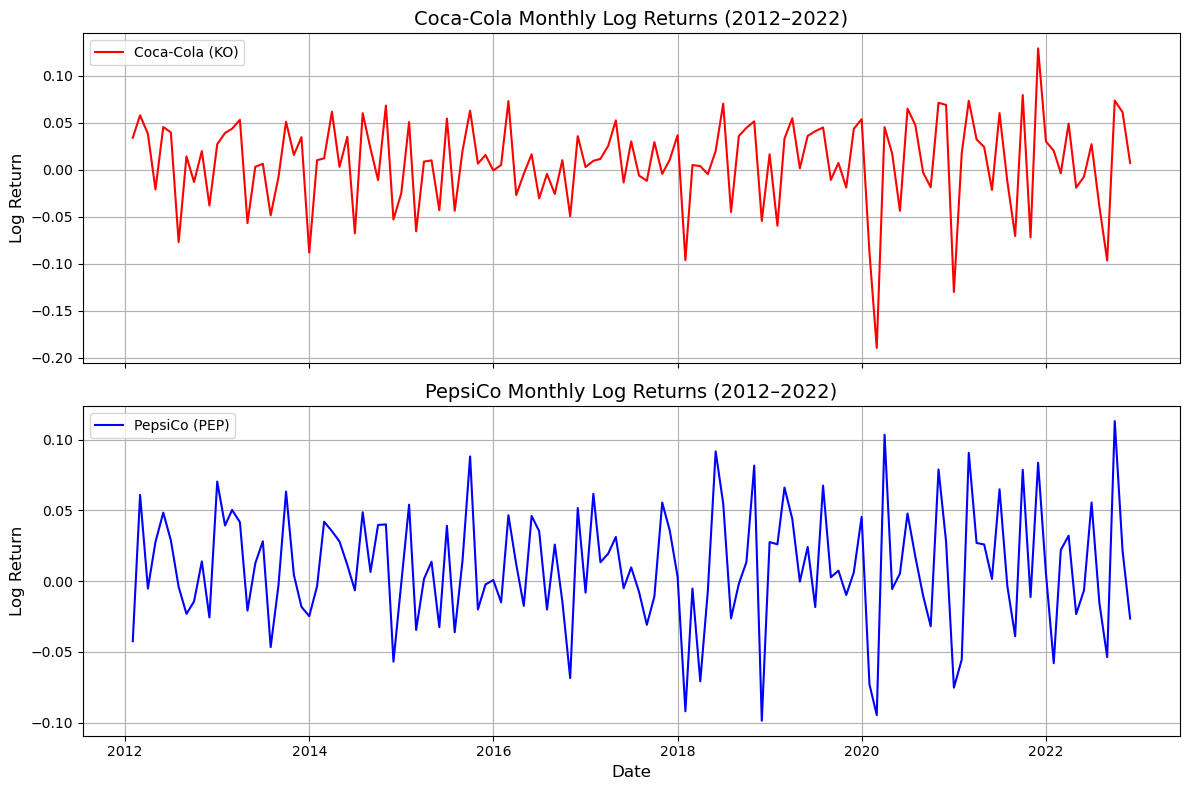

In [18]:
#graphing log return ser
# Create subplots: 2 rows, 1 column, shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot Coca-Cola log returns
ax1.plot(data['ret_log_KO'], color='red', linewidth=1.5, label='Coca-Cola (KO)')
ax1.set_title('Coca-Cola Monthly Log Returns (2012–2022)', fontsize=14)
ax1.set_ylabel('Log Return', fontsize=12)
ax1.legend()
ax1.grid(True)

# Plot PepsiCo log returns
ax2.plot(data['ret_log_PEP'], color='blue', linewidth=1.5, label='PepsiCo (PEP)')
ax2.set_title('PepsiCo Monthly Log Returns (2012–2022)', fontsize=14)
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Log Return', fontsize=12)
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [22]:
#analyzing the log return series
data["ret_log_KO"].describe()

count    131.000000
mean       0.010108
std        0.041943
min       -0.098695
25%       -0.014778
50%        0.006466
75%        0.039479
max        0.113050
Name: ret_log_PEP, dtype: float64

In [23]:
data["ret_log_PEP"].describe()

count    131.000000
mean       0.010108
std        0.041943
min       -0.098695
25%       -0.014778
50%        0.006466
75%        0.039479
max        0.113050
Name: ret_log_PEP, dtype: float64

In [24]:
import scipy.stats as stats
from scipy.stats import skew, kurtosis

# Create a returns DataFrame with both stocks' log returns
log_returns = data[['ret_log_KO', 'ret_log_PEP']].copy()

# Drop the first row to remove the NaN from the log return calculation
log_returns = log_returns.dropna()

# Calculate summary statistics
stats_df = pd.DataFrame({
    'Mean': log_returns.mean(),
    'Std Dev': log_returns.std(),
    'Skewness': log_returns.apply(skew),
    'Kurtosis': log_returns.apply(kurtosis),
    'Max': log_returns.max(),
    'Min': log_returns.min()
})

stats_df

,,Mean,Std Dev,Skewness,Kurtosis,Max,Min
Price,Ticker,,,,,,
ret_log_KO,,0.007448,0.047185,-0.918699,1.796982,0.128955,-0.189640
ret_log_PEP,,0.010108,0.041943,-0.120639,0.016154,0.113050,-0.098695


In [25]:
# Create a DataFrame with close prices for KO and PEP
close_prices = close_prices.dropna()

# Calculate summary statistics
stats_close_df = pd.DataFrame({
    'Mean': close_prices.mean(),
    'Std Dev': close_prices.std(),
    'Skewness': close_prices.apply(skew),
    'Kurtosis': close_prices.apply(kurtosis),
    'Max': close_prices.max(),
    'Min': close_prices.min()
})

stats_close_df

,Mean,Std Dev,Skewness,Kurtosis,Max,Min
Ticker,,,,,,
KO,36.946057,9.610608,0.736829,-0.403699,59.398674,22.388090
PEP,93.002960,33.212314,0.563983,-0.575572,172.132385,42.738892
